In [2]:
import os

os.environ["OMP_NUM_THREADS"] = "40"
os.environ["NUMBA_NUM_THREADS"] = "40"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [4]:
import sys
sys.path.append("../code/")

In [5]:
from labs import true_optimal_mf
from objectives import get_random_guess_merit_factor

In [49]:
# Load directly optimized parameters
df_overlap = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')
df_MF = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_MF.json', orient='index')

In [50]:
# Load transferred parameters
df_tran_mf_22 = pd.read_json('../qokit/assets/transferred_from_22_MF.json', orient='index')

In [398]:
df_tran_mf_22_extra = pd.read_json('../qokit/assets/transferred_from_22_with_fourier_extrapolation_MF.json', orient='index')

In [51]:
df_tran_mf_22 = pd.concat([df_tran_mf_22, df_tran_mf_22_extra])

NameError: name 'df_tran_mf_22_extra' is not defined

In [53]:
df_tran_batch_overlap_0113 = pd.read_json('../qokit/assets/transferred_from_batch_0113.json', orient='index')

In [54]:
df_tran_batch_overlap_0123 = pd.read_json('../qokit/assets/transferred_from_batch_0123.json', orient='index')

In [55]:
df_tran_batch_overlap_0124 = pd.read_json('../qokit/assets/transferred_from_batch_0124.json', orient='index')

In [56]:
df_tran_extrapol_batch_overlap_0124 = pd.read_json('../qokit/assets/transferred_extrapolated_from_batch_0124_at_p_10.json', orient='index')

In [57]:
df_tran_gibbs = pd.read_json('../qokit/assets/transfer_gibbs.json', orient='index')

In [58]:
df_tran_gibbs_mean = pd.read_json('../qokit/assets/transferred_mean_gibbs_0217.json', orient='index')

In [122]:
df_tran_overlap_mean_old = pd.read_json('../qokit/assets/transferred_mean_overlap_0217.json', orient='index')

In [179]:
df_tran_overlap_mean = pd.read_json('../qokit/assets/transferred_mean_overlap_0227.json', orient='index')

In [60]:
df_tran_overlap_median = pd.read_json('../qokit/assets/transferred_median_overlap_0220.json', orient='index')

In [61]:
df_tran_overlap_29 = pd.read_json('../qokit/assets/transferred_from_29_overlap.json', orient='index')
df_tran_overlap_30 = pd.read_json('../qokit/assets/transferred_from_30_overlap.json', orient='index')

In [139]:
df_tran_extrap_overlap_mean = pd.read_json('../qokit/assets/transferred_extrapolated_from_mean_overlap_0217_at_p_16.json', orient='index')

In [14]:
# data/0124_transfer_from_batch_* is batch v3

## Visually compare the best p for N=26...

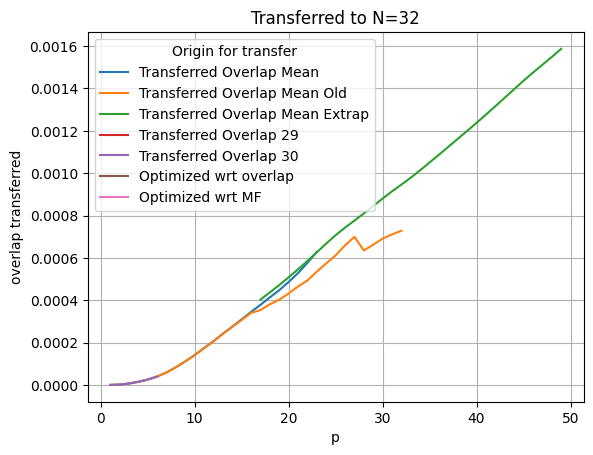

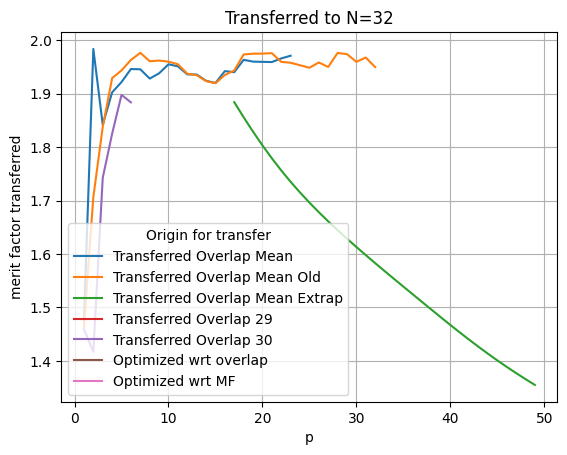

In [141]:
N = 32
max_p = 50
for label_to_plot in ['overlap transferred', 'merit factor transferred']:
    f, ax = plt.subplots()
    for label, df_tran in [
        # ("Transferred from N=22", df_tran_mf_22),  
        # ("N=22 overlap", df_tran_overlap_22),  
        # ("N=23 overlap", df_tran_overlap_23),  
        # ("Transferred from Batch Old", df_tran_batch_overlap_0113),  
        # ("Transferred v3", df_tran_batch_overlap_0124),  
        # ("Transferred extrap", df_tran_extrapol_batch_overlap_0124), 
        # ("Transferred Gibbs", df_tran_gibbs),  
        # ("Transferred from Batch New", df_tran_batch_overlap_0123),  
        ("Transferred Overlap Mean", df_tran_overlap_mean),  
        ("Transferred Overlap Mean Old", df_tran_overlap_mean_old),  
        ("Transferred Overlap Mean Extrap", df_tran_extrap_overlap_mean),  
        ("Transferred Overlap 29", df_tran_overlap_29),  
        ("Transferred Overlap 30", df_tran_overlap_30),  
        # ("Transferred Overlap Median", df_tran_overlap_mean),  
        # ("Transferred Gibbs Mean", df_tran_gibbs_mean),  
        ("Optimized wrt overlap", df_overlap), 
        ("Optimized wrt MF", df_MF),
    ]:
        if 'Optimized' in label:
            label_to_plot_processed = " ".join(label_to_plot.split(" ")[:-1])
        else:
            label_to_plot_processed = label_to_plot
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot_processed].plot(legend=True, ax=ax, label=label)
        
        plt.legend(title="Origin for transfer")
    plt.title(f"Transferred to N={N}")
    ax.set_ylabel(label_to_plot)
    # ax.set_xlim(0,19)
    plt.grid()
    plt.show()

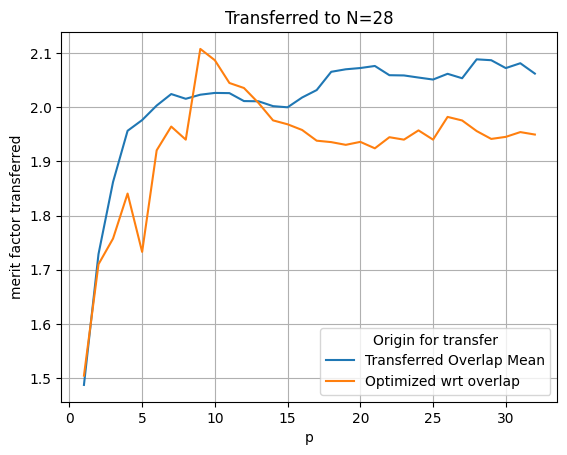

In [306]:
N = 28
max_p = 175
for label_to_plot in ['merit factor transferred']:
    f, ax = plt.subplots()
    for label, df_tran in [
        # ("Transferred from N=22", df_tran_mf_22),  
        # ("N=22 overlap", df_tran_overlap_22),  
        # ("N=23 overlap", df_tran_overlap_23),  
        # ("Transferred from Batch Old", df_tran_batch_overlap_0113),  
        # ("Transferred v3", df_tran_batch_overlap_0124),  
        # ("Transferred extrap", df_tran_extrapol_batch_overlap_0124), 
        # ("Transferred Gibbs", df_tran_gibbs),  
        # ("Transferred from Batch New", df_tran_batch_overlap_0123),  
        ("Transferred Overlap Mean", df_tran_overlap_mean),  
        # ("Transferred Overlap Median", df_tran_overlap_mean),  
        # ("Transferred Gibbs Mean", df_tran_gibbs_mean),  
        ("Optimized wrt overlap", df_overlap), 
        # ("Optimized wrt MF", df_MF),
    ]:
        if 'Optimized' in label:
            label_to_plot_processed = " ".join(label_to_plot.split(" ")[:-1])
        else:
            label_to_plot_processed = label_to_plot
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot_processed].plot(legend=True, ax=ax, label=label)
        
        plt.legend(title="Origin for transfer")
    plt.title(f"Transferred to N={N}")
    ax.set_ylabel(label_to_plot)
    plt.grid()
    plt.show()

## ...with that for N=31

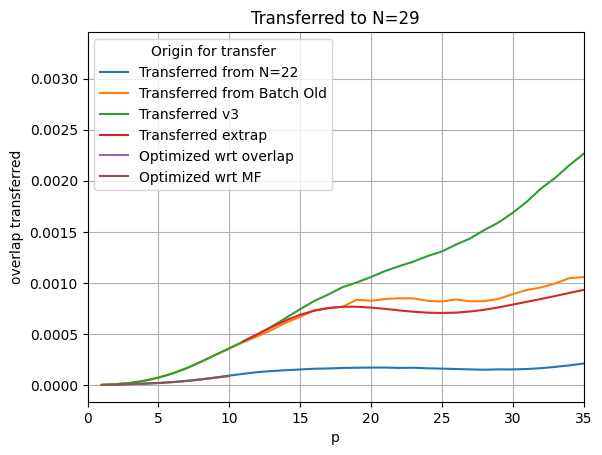

In [81]:
N = 29
max_p = 175
for label_to_plot in ['overlap transferred']: #, 'merit factor transferred']:
    f, ax = plt.subplots()
    for label, df_tran in [
        ("Transferred from N=22", df_tran_mf_22),  
        # ("N=22 overlap", df_tran_overlap_22),  
        # ("N=23 overlap", df_tran_overlap_23),  
        ("Transferred from Batch Old", df_tran_batch_overlap_0113),  
        ("Transferred v3", df_tran_batch_overlap_0124),  
        ("Transferred extrap", df_tran_extrapol_batch_overlap_0124),  
        # ("Transferred from Batch New", df_tran_batch_overlap_0123),  
        ("Optimized wrt overlap", df_overlap), 
        ("Optimized wrt MF", df_MF),
    ]:
        if 'Optimized' in label:
            label_to_plot_processed = " ".join(label_to_plot.split(" ")[:-1])
        else:
            label_to_plot_processed = label_to_plot
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot_processed].plot(legend=True, ax=ax, label=label)
        
        plt.legend(title="Origin for transfer")
    plt.title(f"Transferred to N={N}")
    ax.set_ylabel(label_to_plot)
    ax.set_xlim(0, 35)
    plt.grid()
    plt.show()

## The peaks are in different spots!

In [187]:

np.arange(20,34,2)

array([20, 22, 24, 26, 28, 30, 32])

In [86]:
import statsmodels.api as sm
    
def plot_scaling(dftmp, p, max_n = 32, min_n = 24, ignore_skew=True):
    df_gurobi = pd.read_csv(
        "../qokit/assets/classical_solvers/gurobi_TTS_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
    )

    dftmp['TTS'] = 1 / dftmp['overlap transferred']
    
    if ignore_skew:
        Ns = np.array([x for x in np.arange(min_n, max_n+1) if x not in [17,27,29]])
    else:
        Ns = np.arange(min_n, max_n+1)
    TTS_QAOA = []
    for N in Ns:
        dfslice = dftmp[(dftmp['N'] == N) & (dftmp['p'] <= p)].set_index('p')
        TTS_QAOA.append(dfslice['TTS'].min())
        
    TTS_QAOA = np.array(TTS_QAOA)
    
    plt.plot(Ns, TTS_QAOA, c='k', label='QAOA best over all p')
    
    X = sm.add_constant(Ns)

    mod = sm.OLS(np.log(TTS_QAOA), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(Ns, np.e**pred.predicted_mean, c='k', linestyle='dashed',
             label=f'QAOA (best) fit:  {np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')


    if ignore_skew:
        dftmp = dftmp[
            (dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n) & (dftmp['N'] != 17) & (dftmp['N'] != 27) & (dftmp['N'] != 29)
        ]
    else:
        dftmp = dftmp[(dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n)]

    plt.plot(dftmp['N'].values, dftmp['TTS'].values, c='b', label='QAOA')

    X = sm.add_constant(dftmp['N'].values)

    mod = sm.OLS(np.log(dftmp['TTS'].values), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(dftmp['N'].values, np.e**pred.predicted_mean, c='b', linestyle='dashed',
             label=f'QAOA fit:  {np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')


    if ignore_skew:
        df_gurobi = df_gurobi[
            (df_gurobi['n'] >= dftmp['N'].min()) & (df_gurobi['n'] <= dftmp['N'].max()) & (df_gurobi['n'] != 17) & (df_gurobi['n'] != 27) & (df_gurobi['n'] != 29)
        ]
    else:
        df_gurobi = df_gurobi[(df_gurobi['n'] >= dftmp['N'].min()) & (df_gurobi['n'] <= dftmp['N'].max())]
    df_gurobi['TTS scaled'] = dftmp['TTS'].values[0] * df_gurobi["TTS_process_time"] / df_gurobi["TTS_process_time"].values[0]

    plt.plot(dftmp['N'].values, df_gurobi['TTS scaled'].values, c='orange', label='Gurobi')

    mod = sm.OLS(np.log(df_gurobi['TTS scaled'].values), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(dftmp['N'].values, np.e**pred.predicted_mean, c='orange', linestyle='dashed',
             label=f'Gurobi fit:  {np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')

    plt.xlabel('N')
    plt.yscale('log')
    plt.title(f"p={p}")
    plt.legend()


    
def plot_scaling_coeffs(dftmp, max_p, min_p=1, max_n = 32, min_n = 24, ignore_skew=True, ax=None):
    
    dftmp['TTS'] = 1 / dftmp['overlap transferred']
    
    if ax is None:
        _, ax = plt.subplots()

    ps = range(min_p, max_p)
    ps_to_plot = []
    coefs = []
    ci_mins = []
    ci_maxs = []
    runtimes = []

    for p in ps:
        if ignore_skew:
            dftmp_slice = dftmp[
                (dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n) & (dftmp['N'] != 17) & (dftmp['N'] != 27) & (dftmp['N'] != 29)
            ]
        else:
            dftmp_slice = dftmp[(dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n)]
        
        X = sm.add_constant(dftmp_slice['N'].values)

        mod = sm.OLS(np.log(dftmp_slice['TTS'].values), X)
        res = mod.fit()
    
        coefs.append(np.e**res.params[1])
        ci_mins.append(np.e**(res.params[1]-res.bse[1]))
        ci_maxs.append(np.e**(res.params[1]+res.bse[1]))
        ps_to_plot.append(p)
        runtimes.append(p*np.e**(res.predict([1, 67])))

    ax.plot(ps_to_plot, coefs, label="Transfer from 22", c='b')
    ax.fill_between(ps_to_plot, ci_mins, ci_maxs, color='b', alpha=0.2)
    plt.xlabel('p')
    plt.ylabel('Coeff b in b**N fit')
    plt.title(f'Best estimated runtime for N=67: {np.min(runtimes) / 360000:.2f} hours')

## See how best over all p line is very different from line for fixed p

Much lower for small N and very close for high N. This is what gives nice scaling

Text(0, 0.5, 'TTS')

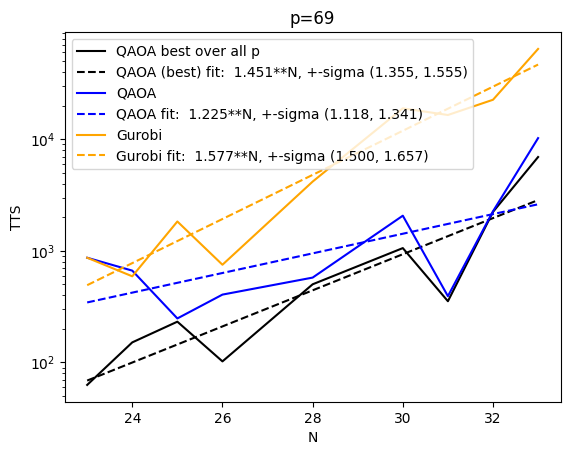

In [89]:
plot_scaling(df_tran_batch_overlap_0113, 69, max_n=33, min_n=23)
plt.ylabel('TTS')
# plt.savefig('figures/scaling_overlap_batch_v1.pdf')

## With parameters optimized for merit factor, the fit is much more robust

Text(0, 0.5, 'TTS')

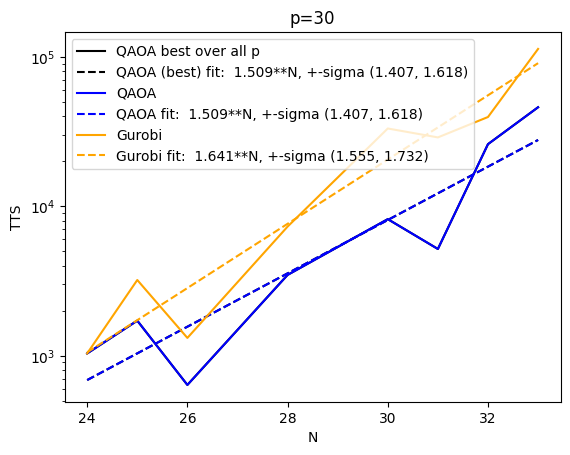

In [110]:
plot_scaling(df_tran_mf_22, 30, max_n=33)
plt.ylabel('TTS')
# plt.savefig('figures/scaling_mf.pdf')

Text(0, 0.5, 'TTS')

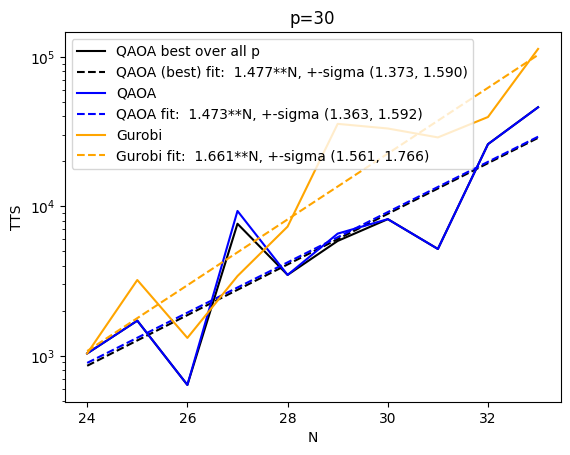

In [111]:
plot_scaling(df_tran_mf_22, 30, max_n=33, ignore_skew=False)
plt.ylabel('TTS')
# plt.savefig('figures/scaling_mf.pdf')

Text(0, 0.5, 'TTS')

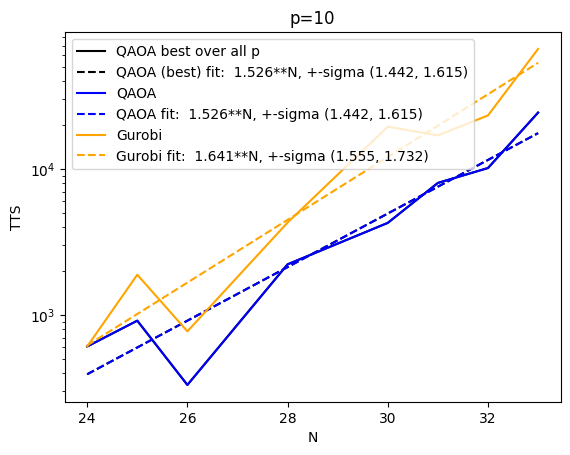

In [121]:
plot_scaling(df_tran_batch_overlap_0124, 10, max_n=33)
plt.ylabel('TTS')

Text(0, 0.5, 'TTS')

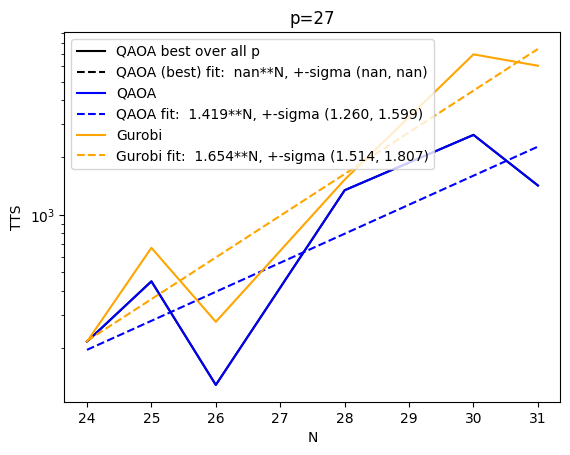

In [ ]:
plot_scaling(df_tran_extrapol_batch_overlap_0124, 27)
plt.ylabel('TTS')

Text(0, 0.5, 'TTS')

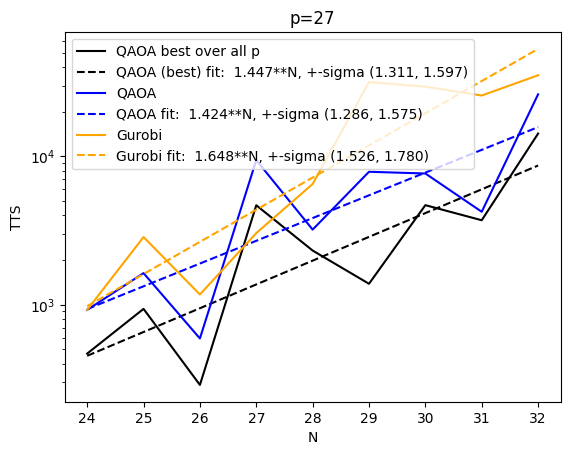

In [74]:
plot_scaling(df_tran_gibbs, 27)
plt.ylabel('TTS')

Text(0, 0.5, 'TTS')

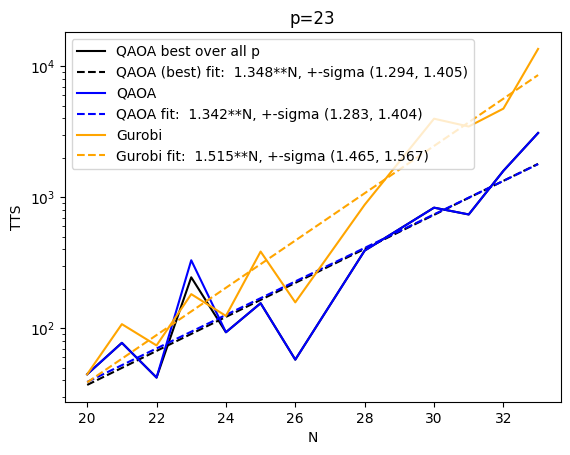

In [191]:
plot_scaling(df_tran_overlap_mean, 23, min_n=20, max_n=33)
plt.ylabel('TTS')

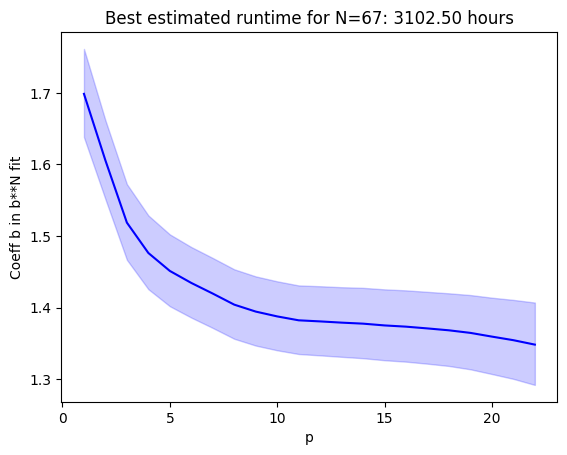

In [185]:
plot_scaling_coeffs(df_tran_overlap_mean, 23, min_n=20, max_n=33)

Text(0, 0.5, 'TTS')

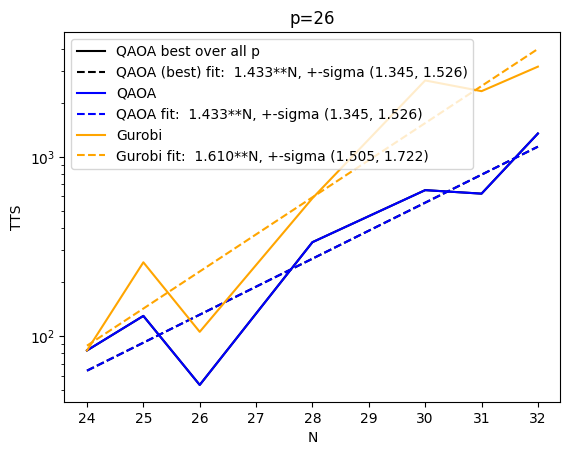

In [119]:
plot_scaling(df_tran_extrap_overlap_mean, 26, min_n=24, max_n=32)
plt.ylabel('TTS')

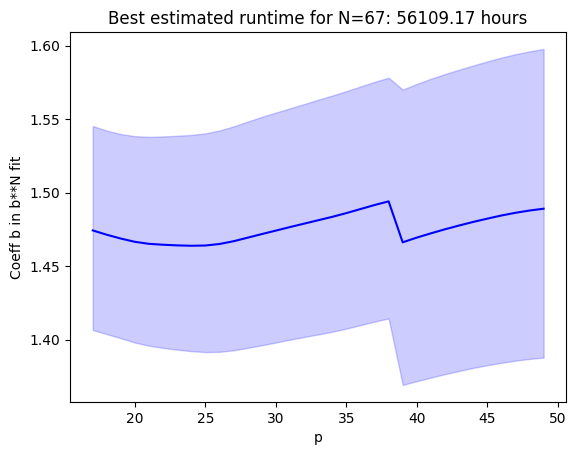

In [144]:
plot_scaling_coeffs(df_tran_extrap_overlap_mean, 50, min_p=17, min_n=24, max_n=33)

## Scaling with changing p

In [168]:
def plot_scaling_linear_p(dftmp, p_max, max_n = 32, min_n = 24, ignore_skew=True):
    """
    For each N, p goes up linearly from p_max - (max_n - min_n) up to p_max
    """
    assert p_max > max_n - min_n
    
    df_gurobi = pd.read_csv(
        "../qokit/assets/classical_solvers/gurobi_TTS_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
    )
    # df_gurobi = pd.read_csv(
    #     "../qokit/assets/classical_solvers/gurobi_TTO_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
    # ).rename(columns={'process_time': 'TTS_process_time'})

    dftmp['TTS'] = 1 / dftmp['overlap transferred']
    
    if ignore_skew:
        Ns = np.array([x for x in np.arange(min_n, max_n+1) if x not in [17,27,29]])
    else:
        Ns = np.arange(min_n, max_n+1)
        
    TTS_QAOA = []
    for N in Ns:
        dfslice = dftmp[(dftmp['N'] == N) & (dftmp['p'] == (p_max - (max_n - N)))]
        assert len(dfslice) == 1
        dfslice = dfslice.squeeze()
        TTS_QAOA.append(dfslice['TTS'])
        
    TTS_QAOA = np.array(TTS_QAOA)
    
    plt.plot(Ns, TTS_QAOA, c='k', label='QAOA')
    
    X = sm.add_constant(Ns)

    mod = sm.OLS(np.log(TTS_QAOA), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(Ns, np.e**pred.predicted_mean, c='k', linestyle='dashed',
             label=f'QAOA fit:  N*{np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')

    if ignore_skew:
        df_gurobi = df_gurobi[
            (df_gurobi['n'] >= min_n) & (df_gurobi['n'] <= max_n) & (df_gurobi['n'] != 17) & (df_gurobi['n'] != 27) & (df_gurobi['n'] != 29)
        ]
    else:
        df_gurobi = df_gurobi[(df_gurobi['n'] >= min_n) & (df_gurobi['n'] <= max_n)]
    df_gurobi['TTS scaled'] = TTS_QAOA[0] * df_gurobi["TTS_process_time"] / df_gurobi["TTS_process_time"].values[0]

    plt.plot(Ns, df_gurobi['TTS scaled'].values, c='orange', label='Gurobi')

    mod = sm.OLS(np.log(df_gurobi['TTS scaled'].values / Ns), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(Ns, Ns*np.e**pred.predicted_mean, c='orange', linestyle='dashed',
             label=f'Gurobi fit:  N*{np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')

    plt.xlabel('N')
    plt.ylabel('TTS')
    plt.yscale('log')
    plt.title(f"p(N) = N - {max_n - p_max} (i.e., linear between {p_max - (max_n - min_n)} and {p_max})")
    plt.legend()



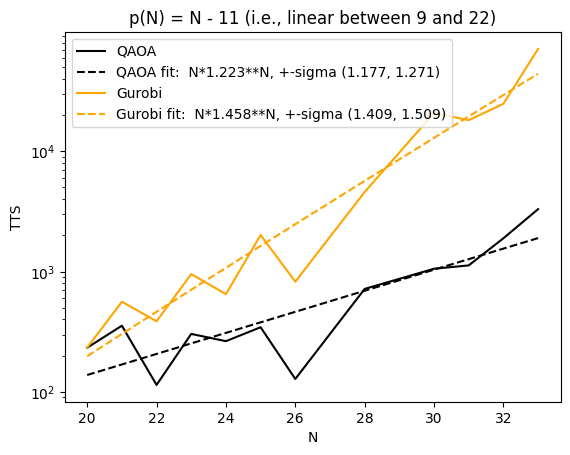

In [172]:
plot_scaling_linear_p(df_tran_overlap_mean, 22, min_n=20, max_n=33, ignore_skew=True)

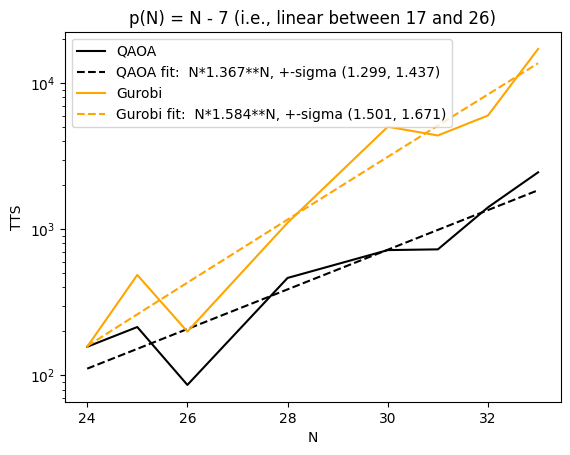

In [161]:
plot_scaling_linear_p(df_tran_extrap_overlap_mean, 26, min_n=24, max_n=33, ignore_skew=True)

# Scaling at intermediate point

In [435]:
def get_df_intermed(p_max):
    rows = []

    for N in range(20,34):
        df_suffix = "_overlap"

        outpath = f"../scripts/data/0221_intermediate_for_transferred_mean_overlap_0217_{N}_{p_max}.pickle"

        res = pickle.load(open(outpath, "rb"))
        for p in range(1, p_max+1):
            rows.append(
                {
                    "N" : N,
                    "p" : p,
                    "overlap transferred" : res["overlaps"][p-1],
                    "merit factor transferred" : res["merit_factors"][p-1],
                }
            )

    return pd.DataFrame(rows, columns=rows[0].keys())

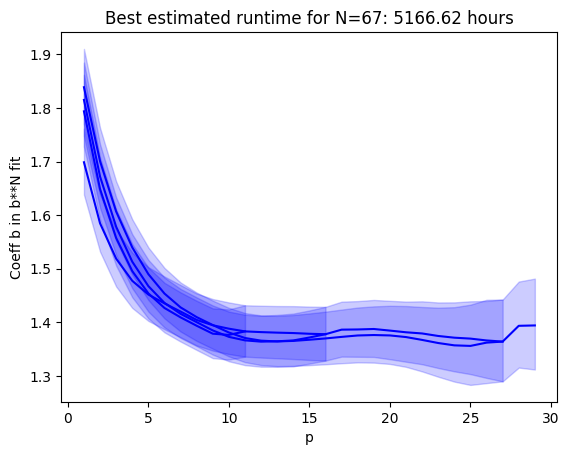

In [444]:
f, ax = plt.subplots()
for p_max in [11, 16, 27]:
    plot_scaling_coeffs(get_df_intermed(p_max), p_max+1, min_n=20, max_n=33, ax=ax)
plot_scaling_coeffs(df_tran_overlap_mean, 30, min_n=20, max_n=33, ax=ax)

## How robust is the fit to the window choice?

In [101]:
def get_scaling_coeffs(dftmp, p, min_n, max_n):
    
    dftmp['TTS'] = 1 / dftmp['overlap transferred']

    dftmp_slice = dftmp[(dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n)]
    if len(dftmp_slice) != (max_n-min_n+1):
        assert False

    X = sm.add_constant(dftmp_slice['N'].values)

    mod = sm.OLS(np.log(dftmp_slice['TTS'].values), X)
    res = mod.fit()
    
    return np.e**res.params[1], np.e**(res.params[1]-res.bse[1]), np.e**(res.params[1]+res.bse[1])

def print_fits_for_all_windows(dftmp, min_n, max_n):
    for window_width in range(5, 10):
        for bottom in range(min_n, max_n):
            top = bottom+window_width
            if top > max_n:
                continue
            fit, min_ci, max_ci = get_scaling_coeffs(dftmp, 69, bottom, top)
            print(f"{fit:.2f} {min_ci:.2f} {max_ci:.2f}")

In [102]:
print_fits_for_all_windows(df_tran_batch_overlap_0113, 23, 32)

1.11 0.87 1.41
1.10 0.86 1.40
1.30 1.02 1.67
0.94 0.73 1.21
0.94 0.73 1.21
1.03 0.86 1.22
1.20 1.00 1.44
1.10 0.90 1.34
1.07 0.88 1.30
1.12 0.97 1.29
1.07 0.92 1.24
1.17 1.00 1.37
1.03 0.92 1.16
1.13 1.00 1.28
1.09 0.99 1.20


In [103]:
print_fits_for_all_windows(df_tran_mf_22, 23, 32)

2.16 1.65 2.83
1.44 1.18 1.76
1.46 1.20 1.78
1.39 1.13 1.71
1.21 1.06 1.39
1.88 1.53 2.31
1.44 1.25 1.66
1.34 1.16 1.55
1.48 1.27 1.73
1.77 1.51 2.08
1.35 1.21 1.51
1.42 1.27 1.60
1.61 1.41 1.84
1.42 1.29 1.55
1.62 1.46 1.81


# Reasoning about the robustness of the Gurobi fit

In [262]:
!ls ../qokit/assets/classical_solvers/

gurobi_TTO_LABS_Threads_8_Cuts_0_Heuristics_0.csv  parameters.md
gurobi_TTS_LABS_Threads_8_Cuts_0_Heuristics_0.csv


In [222]:
df_gurobi_TTS = pd.read_csv(
    "../qokit/assets/classical_solvers/gurobi_TTS_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
)

In [223]:
df_gurobi_TTO = pd.read_csv(
    "../qokit/assets/classical_solvers/gurobi_TTO_LABS_Threads_8_Cuts_0_Heuristics_0.csv"
)

In [224]:
def plot_scaling_simple(dftmp, max_n = 32, min_n = 24, ignore_skew=True):
    if ignore_skew:
        dftmp = dftmp[
            (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n) & (dftmp['N'] != 17) & (dftmp['N'] != 27) & (dftmp['N'] != 29)
        ]
    else:
        dftmp = dftmp[(dftmp['p'] == p) & (dftmp['N'] >= min_n) & (dftmp['N'] <= max_n)]
        
    plt.plot(dftmp['N'].values, dftmp['TTS'].values, c='b', label='Data')

    X = sm.add_constant(dftmp['N'].values)

    mod = sm.OLS(np.log(dftmp['TTS'].values), X)
    res = mod.fit()
    pred = res.get_prediction(X)

    plt.plot(dftmp['N'].values, np.e**pred.predicted_mean, c='b', linestyle='dashed',
             label=f'Fit:  {np.e**res.params[1]:.3f}**N, +-sigma ({np.e**(res.params[1]-res.bse[1]):.3f}, {np.e**(res.params[1]+res.bse[1]):.3f})')

    plt.xlabel('N')
    plt.yscale('log')
    plt.legend()
    
    

Text(0.5, 1.0, 'Gurobi TTS process time')

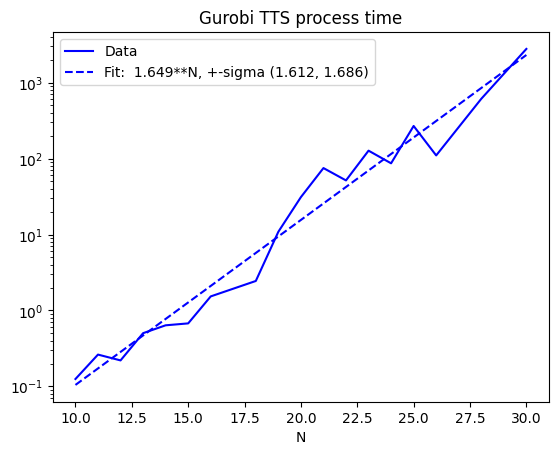

In [250]:
plot_scaling_simple(df_gurobi_TTS.rename(columns={"n":"N", "TTS_process_time":"TTS"}), min_n=10, max_n=30)
plt.title('Gurobi TTS process time')

Text(0.5, 1.0, 'Gurobi TTS process time')

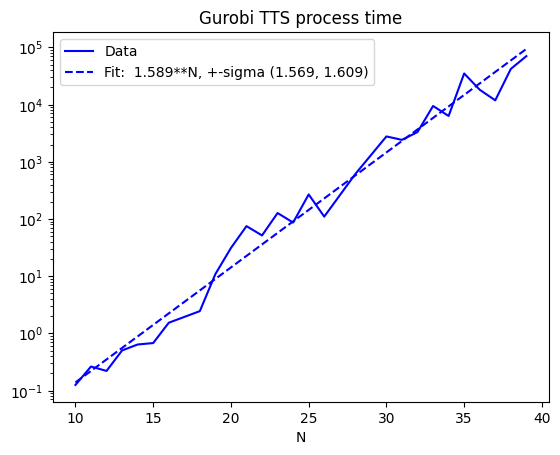

In [252]:
plot_scaling_simple(df_gurobi_TTS.rename(columns={"n":"N", "TTS_process_time":"TTS"}), min_n=10, max_n=39)
plt.title('Gurobi TTS process time')

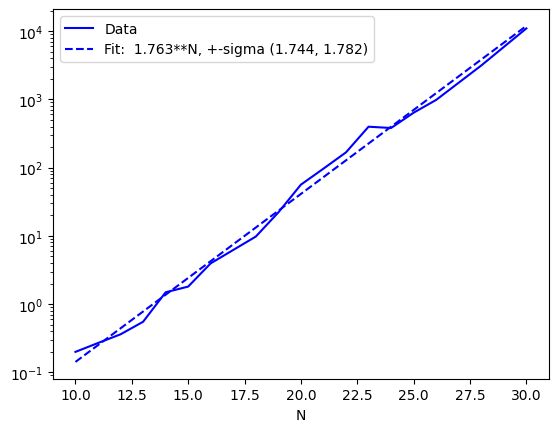

In [246]:
plot_scaling_simple(df_gurobi_TTO.rename(columns={"n":"N", "process_time":"TTS"}), min_n=10, max_n=30)